In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm
import random
import importlib
import mpt_functions as mpt
importlib.reload(mpt)

<module 'mpt_functions' from 'd:\\Code\\GradProject-Bilge\\mpt_functions.py'>

In [3]:
path = "C:/Users/bilge/Downloads/MetroPT3(AirCompressor).csv"
df = mpt.get_the_data_and_convert_datetime(path)
df = mpt.drop_a_column(df, "Unnamed: 0")
df.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [27]:
df_day1 = mpt.filter_a_day("2020-03-07",df)
df_day1

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,2020-03-07 00:00:03,-0.012,8.326,8.316,-0.022,8.324,64.075,0.0375,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
1,2020-03-07 00:00:13,-0.012,8.214,8.204,-0.022,8.212,64.250,0.0375,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
2,2020-03-07 00:00:23,-0.012,8.202,8.194,-0.022,8.202,64.525,0.0375,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
3,2020-03-07 00:00:32,-0.012,8.198,8.188,-0.024,8.196,64.650,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
4,2020-03-07 00:00:42,-0.012,8.194,8.184,-0.022,8.192,64.575,0.0375,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038,2020-03-07 23:59:13,-0.014,9.506,9.494,-0.024,9.502,56.000,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
3039,2020-03-07 23:59:23,-0.016,9.500,9.486,-0.024,9.494,55.950,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
3040,2020-03-07 23:59:33,-0.016,9.490,9.480,-0.026,9.486,55.875,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
3041,2020-03-07 23:59:43,-0.014,9.486,9.474,-0.024,9.482,55.975,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0


In [28]:
df_day1 = mpt.aggregate_as_a_minute(df_day1)
df_day1

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,2020-03-07 00:00:00,-0.012000,8.220000,8.210667,-0.022667,8.218333,64.445833,0.037917,1.000000,0.000000,1.000000,1.000000,0.0,1.0,1.0,0.0
1,2020-03-07 00:01:00,2.652000,8.186333,5.429333,-0.023000,8.183667,64.054167,1.865000,0.666667,0.333333,1.000000,0.666667,0.0,1.0,1.0,0.0
2,2020-03-07 00:02:00,9.420000,8.998000,-0.015333,-0.023667,8.993667,66.170833,5.902917,0.000000,1.000000,0.333333,0.000000,0.0,1.0,1.0,0.0
3,2020-03-07 00:03:00,8.537667,9.933000,1.692667,-0.022333,9.928000,72.195833,5.710833,0.166667,0.833333,0.666667,0.166667,0.0,1.0,1.0,0.0
4,2020-03-07 00:04:00,-0.018333,10.061667,10.059333,-0.023667,10.057667,73.387500,3.861250,1.000000,0.000000,1.000000,1.000000,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,2020-03-07 23:55:00,-0.012667,9.736667,9.723667,-0.024333,9.731333,57.858333,0.040833,1.000000,0.000000,1.000000,1.000000,0.0,1.0,1.0,0.0
1436,2020-03-07 23:56:00,-0.013667,9.689333,9.676333,-0.024667,9.682667,57.258333,0.041250,1.000000,0.000000,1.000000,1.000000,0.0,1.0,1.0,0.0
1437,2020-03-07 23:57:00,-0.012667,9.626667,9.613667,-0.024000,9.622000,56.741667,0.040833,1.000000,0.000000,1.000000,1.000000,0.0,1.0,1.0,0.0
1438,2020-03-07 23:58:00,-0.013667,9.548667,9.536667,-0.024000,9.543667,56.279167,0.040000,1.000000,0.000000,1.000000,1.000000,0.0,1.0,1.0,0.0


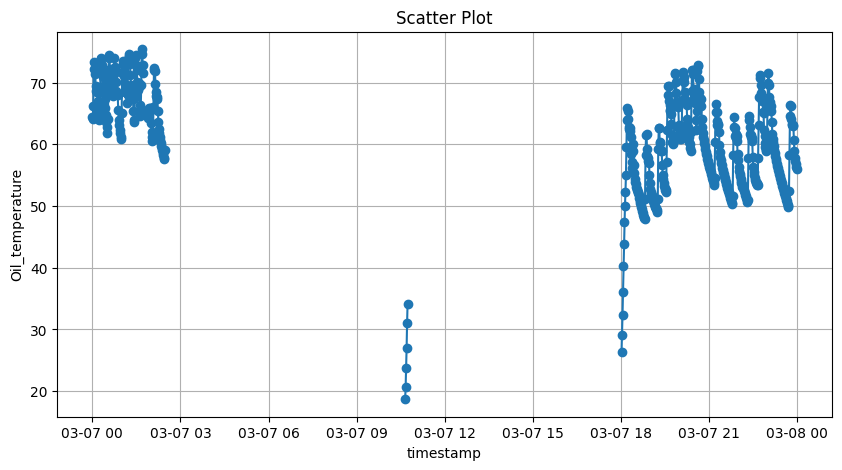

In [29]:
mpt.plot_columns(df_day1,"timestamp", "Oil_temperature")

In [7]:
df_oil_temp = df_day1[["timestamp",'Oil_temperature']]
df_oil_temp.head()

,timestamp,Oil_temperature
0,2020-02-15 00:00:00,60.325000
1,2020-02-15 00:01:00,59.637500
2,2020-02-15 00:02:00,59.416667
3,2020-02-15 00:03:00,59.562500
4,2020-02-15 00:04:00,59.650000


In [8]:
print(df_oil_temp['Oil_temperature'].isna().sum())  # Count NaN values
print((df_oil_temp['Oil_temperature'] == float('inf')).sum())  # Count positive infinity
print((df_oil_temp['Oil_temperature'] == float('-inf')).sum())  # Count negative infinity

0
0
0


In [9]:
# Augmented Dickey-Fuller test for stationarity
adf_test = adfuller(df_oil_temp['Oil_temperature'])
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
if adf_test[1] > 0.05:
    print("Data is non-stationary. Differencing needed.")
    df_oil_temp_diff = df_oil_temp.diff().dropna()

ADF Statistic: -7.490598193690781
p-value: 4.516366706933471e-11


In [10]:
df_oil_temp.head()

,timestamp,Oil_temperature
0,2020-02-15 00:00:00,60.325000
1,2020-02-15 00:01:00,59.637500
2,2020-02-15 00:02:00,59.416667
3,2020-02-15 00:03:00,59.562500
4,2020-02-15 00:04:00,59.650000


In [11]:
print(df_oil_temp.columns)

Index(['timestamp', 'Oil_temperature'], dtype='object')


In [12]:
df_oil_temp.shape

(1440, 2)

In [13]:
forecast_hour_start = pd.Timestamp("2020-02-15 00:00:00")  # Start of the hour
forecast_hour_end = pd.Timestamp("2020-02-15 12:00:00")    # End of the hour


df_hour = df_oil_temp[(df_oil_temp["timestamp"] >= forecast_hour_start) & (df_oil_temp["timestamp"] < forecast_hour_end)]

print("Hourly Data Shape:", df_hour.shape)
print(df_hour.head(12))

Hourly Data Shape: (720, 2)
             timestamp  Oil_temperature
0  2020-02-15 00:00:00        60.325000
1  2020-02-15 00:01:00        59.637500
2  2020-02-15 00:02:00        59.416667
3  2020-02-15 00:03:00        59.562500
4  2020-02-15 00:04:00        59.650000
5  2020-02-15 00:05:00        59.087500
6  2020-02-15 00:06:00        58.570833
7  2020-02-15 00:07:00        58.375000
8  2020-02-15 00:08:00        58.175000
9  2020-02-15 00:09:00        57.966667
10 2020-02-15 00:10:00        57.725000
11 2020-02-15 00:11:00        57.595833


d:\Anaconda\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


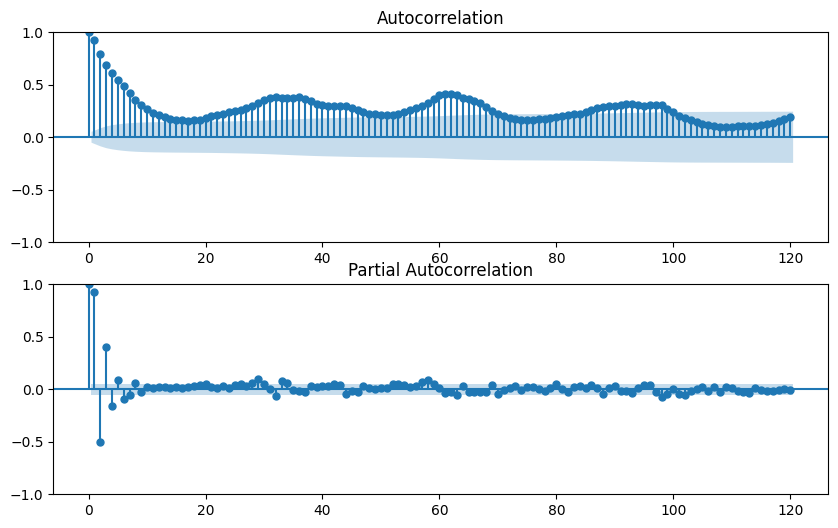

In [14]:
fig, ax = plt.subplots(2, 1, figsize=(10,6))
plot_acf(df_oil_temp["Oil_temperature"], lags=120, ax=ax[0])  # Shows MA(q)
plot_pacf(df_oil_temp["Oil_temperature"], lags=120, ax=ax[1]) # Shows AR(p)
plt.show()

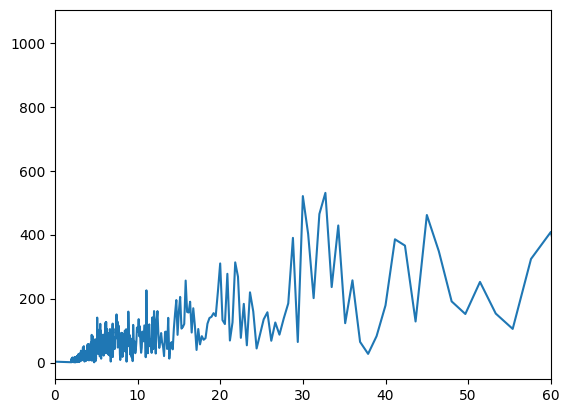

In [15]:
import numpy as np

fft_vals = np.fft.fft(df_oil_temp['Oil_temperature'])
freqs = np.fft.fftfreq(len(fft_vals))

# Avoid division by zero by filtering out zero frequency
nonzero_freqs = freqs[freqs != 0]
nonzero_fft_vals = fft_vals[freqs != 0]

plt.plot(1 / nonzero_freqs, abs(nonzero_fft_vals))  # Period vs. Magnitude
plt.xlim(0, 60)  # Adjust for relevant periods
plt.show()


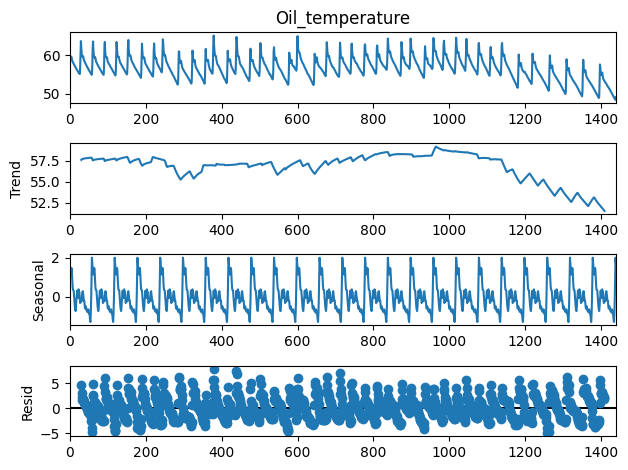

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_oil_temp['Oil_temperature'], period=60, model='additive')  
result.plot()
plt.show()

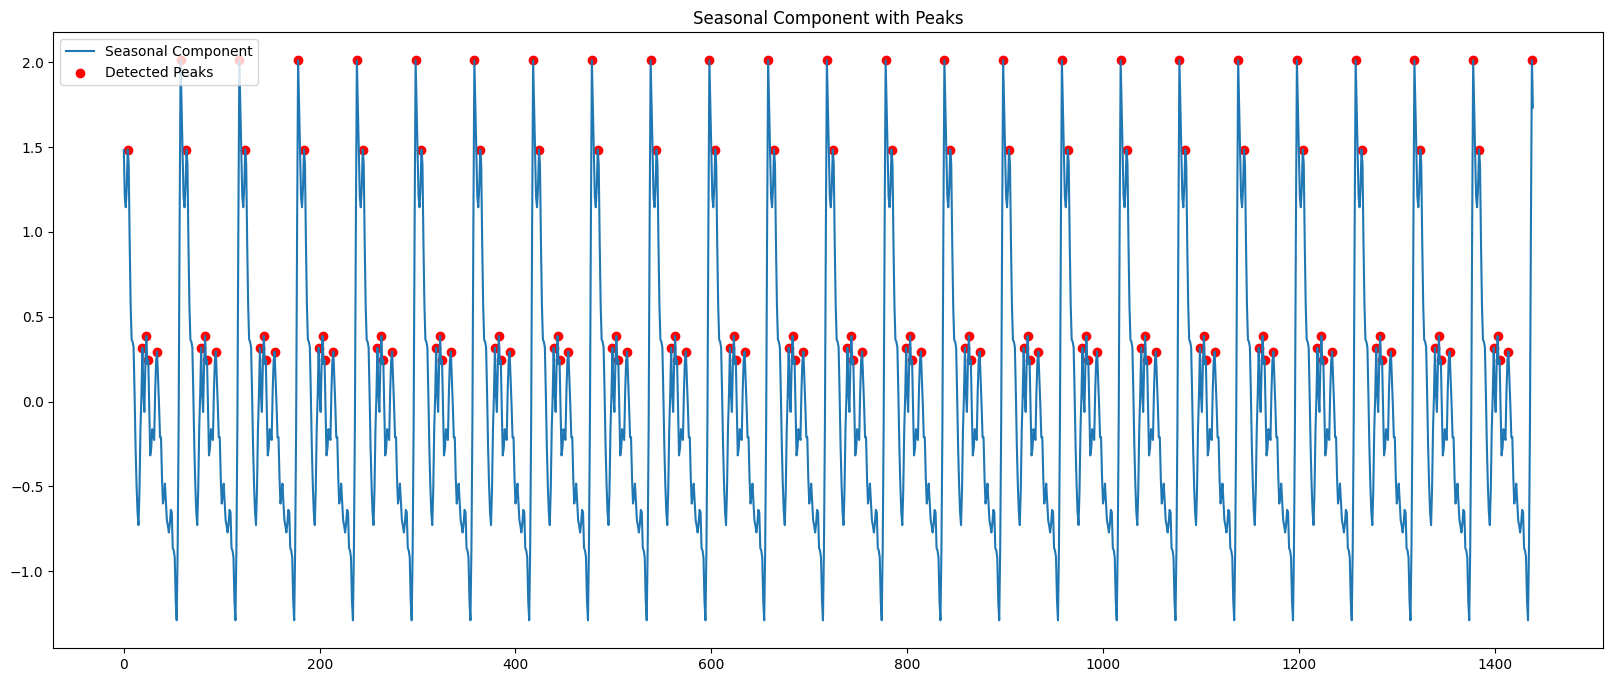

Detected peak positions: [   4   19   23   25   34   58   64   79   83   85   94  118  124  139
  143  145  154  178  184  199  203  205  214  238  244  259  263  265
  274  298  304  319  323  325  334  358  364  379  383  385  394  418
  424  439  443  445  454  478  484  499  503  505  514  538  544  559
  563  565  574  598  604  619  623  625  634  658  664  679  683  685
  694  718  724  739  743  745  754  778  784  799  803  805  814  838
  844  859  863  865  874  898  904  919  923  925  934  958  964  979
  983  985  994 1018 1024 1039 1043 1045 1054 1078 1084 1099 1103 1105
 1114 1138 1144 1159 1163 1165 1174 1198 1204 1219 1223 1225 1234 1258
 1264 1279 1283 1285 1294 1318 1324 1339 1343 1345 1354 1378 1384 1399
 1403 1405 1414 1438]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from statsmodels.tsa.seasonal import seasonal_decompose


result = seasonal_decompose(df_oil_temp['Oil_temperature'], period=60)  # Use s=60 as a starting point
seasonal = result.seasonal

# Detect peaks in the seasonal component
peaks, _ = find_peaks(seasonal, height=0)  # Detects local maxima

# Plot the seasonal component with detected peaks
plt.figure(figsize=(20, 8))
plt.plot(seasonal, label="Seasonal Component")
plt.scatter(peaks, seasonal[peaks], color='red', label="Detected Peaks")
plt.legend()
plt.title("Seasonal Component with Peaks")
plt.show()

# Print detected peak indices
print("Detected peak positions:", peaks)

In [ ]:
from statsmodels.tsa.stattools import kpss

result = kpss(df_oil_temp['Oil_temperature'], regression='c')  # 'c' for constant, 'ct' for trend
print(f"KPSS Test Statistic: {result[0]}")
print(f"p-value: {result[1]}")

KPSS Test Statistic: 1.5062080892140637
p-value: 0.01


d:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model (example)
model = ARIMA(df_hour['Oil_temperature'], order=(2, 0, 2))  # Replace with your target column
model_fit = model.fit()

# Forecast the next 10 minutes
forecast = model_fit.forecast(steps=10)
print("Forecast for the next 10 minutes:", forecast)

Forecast for the next 10 minutes: 720    58.762008
721    58.304153
722    58.025162
723    57.792531
724    57.625945
725    57.497901
726    57.402739
727    57.330885
728    57.277035
729    57.236535
Name: predicted_mean, dtype: float64


In [ ]:
from pmdarima import auto_arima
auto_arima(df_hour['Oil_temperature']).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  720
Model:               SARIMAX(1, 0, 3)   Log Likelihood                -849.517
Date:                Sun, 23 Mar 2025   AIC                           1711.034
Time:                        20:23:55   BIC                           1738.509
Sample:                             0   HQIC                          1721.641
                                - 720                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     12.0311      2.123      5.668      0.000       7.871      16.191
ar.L1          0.7894      0.037     21.355      0.000       0.717       0.862
ma.L1          0.9646      0.038     25.449      0.000       0.890       1.039
ma.L2          0.1265      0.062      2.049      0.041       0.005       0.248
ma.L3         -0.1575      0.053     -2.988      0.003      -0.261      -0.054
sigma2         0.6171      0.030     20.801      0.000       0.559       0.675
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1321.36
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.13   Skew:                             1.78
Prob(H) (two-sided):                  0.35   Kurtosis:                         8.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

            Model          AIC          BIC      RMSE
0  SARIMAX(1,0,3)  2798.721568  2823.950451  3.052184
1  SARIMAX(1,0,2)  2863.769533  2883.956122  2.289728
2  SARIMAX(1,0,1)  2887.627473  2902.770025  2.400354


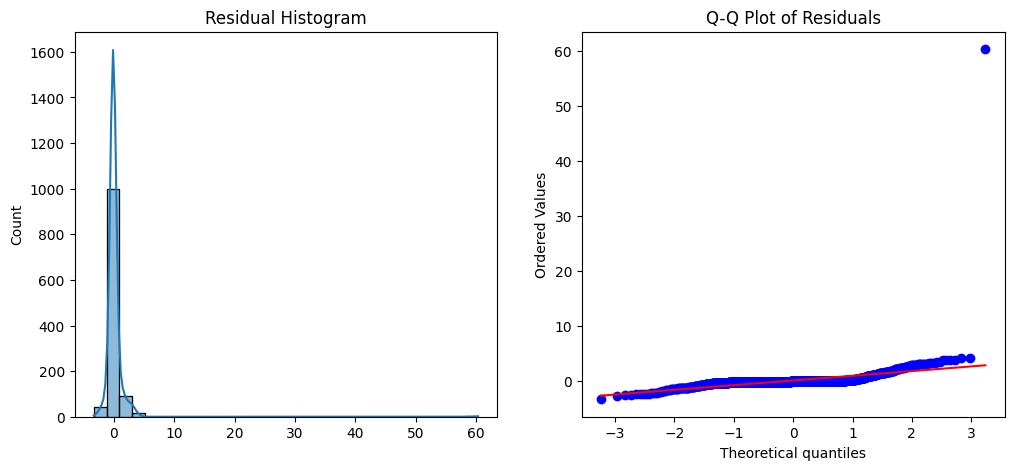

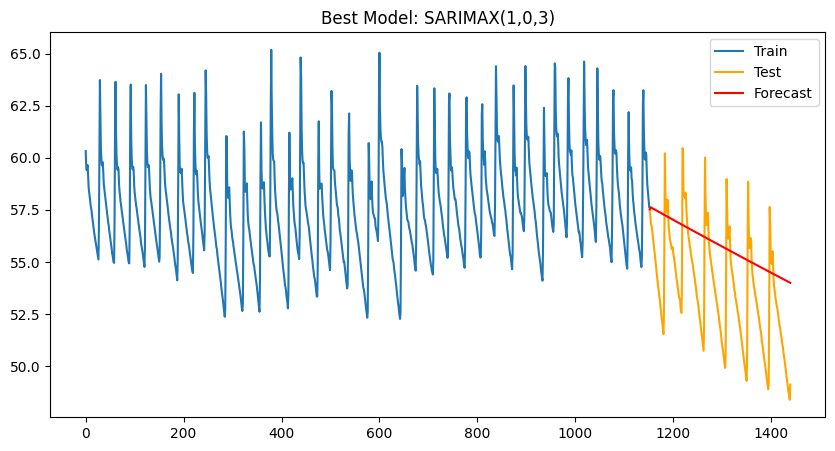

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from scipy.stats import probplot

# Load data
y = df_oil_temp['Oil_temperature']

# Train-test split (80% train, 20% test)
train_size = int(len(y) * 0.8)
train, test = y[:train_size], y[train_size:]

# Define SARIMAX models
models = {
    "SARIMAX(1,0,3)": sm.tsa.SARIMAX(train, order=(1,0,3), enforce_stationarity=False, enforce_invertibility=False),
    "SARIMAX(1,0,2)": sm.tsa.SARIMAX(train, order=(1,0,2), enforce_stationarity=False, enforce_invertibility=False),
    "SARIMAX(1,0,1)": sm.tsa.SARIMAX(train, order=(1,0,1), enforce_stationarity=False, enforce_invertibility=False)
}

# Fit models
results = {name: model.fit(disp=False) for name, model in models.items()}

# Forecast on test set and evaluate RMSE
rmse_results = {}
for name, res in results.items():
    forecast = res.forecast(steps=len(test))
    rmse_results[name] = np.sqrt(mean_squared_error(test, forecast))

# Compare AIC, BIC, and RMSE
comparison_df = pd.DataFrame({
    "Model": results.keys(),
    "AIC": [res.aic for res in results.values()],
    "BIC": [res.bic for res in results.values()],
    "RMSE": rmse_results.values()
}).sort_values(by="AIC")

print(comparison_df)

# Choose best model based on lowest AIC
best_model_name = comparison_df.iloc[0]["Model"]
best_model = results[best_model_name]

# Residual diagnostics for best model
residuals = best_model.resid
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(residuals, bins=30, kde=True, ax=axes[0])
axes[0].set_title("Residual Histogram")
probplot(residuals, plot=axes[1])
axes[1].set_title("Q-Q Plot of Residuals")
plt.show()

# Forecast visualization
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color='orange')
plt.plot(test.index, best_model.forecast(steps=len(test)), label="Forecast", color='red')
plt.legend()
plt.title(f"Best Model: {best_model_name}")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from scipy.stats import probplot

# Load data
y = df_oil_temp['Oil_temperature']

# Train-test split (80% train, 20% test)
train_size = int(len(y) * 0.8)
train, test = y[:train_size], y[train_size:]

# Define SARIMAX models
models = {
    "SARIMAX(1,0,3)": sm.tsa.SARIMAX(train, order=(1,0,3), seasonal_order=(1,1,1,60), enforce_stationarity=False, enforce_invertibility=False),
    "SARIMAX(1,0,1)": sm.tsa.SARIMAX(train, order=(1,0,1), seasonal_order=(1,1,1,60), enforce_stationarity=False, enforce_invertibility=False),
}

# Fit models
results = {name: model.fit(disp=False) for name, model in models.items()}

# Forecast on test set and evaluate RMSE
rmse_results = {}
for name, res in results.items():
    forecast = res.forecast(steps=len(test))
    rmse_results[name] = np.sqrt(mean_squared_error(test, forecast))

# Compare AIC, BIC, and RMSE
comparison_df = pd.DataFrame({
    "Model": results.keys(),
    "AIC": [res.aic for res in results.values()],
    "BIC": [res.bic for res in results.values()],
    "RMSE": rmse_results.values()
}).sort_values(by="AIC")

print(comparison_df)

# Choose best model based on lowest AIC
best_model_name = comparison_df.iloc[0]["Model"]
best_model = results[best_model_name]

# Residual diagnostics for best model
residuals = best_model.resid
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(residuals, bins=30, kde=True, ax=axes[0])
axes[0].set_title("Residual Histogram")
probplot(residuals, plot=axes[1])
axes[1].set_title("Q-Q Plot of Residuals")
plt.show()

# Forecast visualization
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color='orange')
plt.plot(test.index, best_model.forecast(steps=len(test)), label="Forecast", color='red')
plt.legend()
plt.title(f"Best Model: {best_model_name}")
plt.show()


MemoryError: Unable to allocate 135. MiB for an array with shape (124, 124, 1153) and data type float64